# Problem Statement:
Finex is a leading financial service provider based out of Florida, US. It offers a wide range of products and business services to customers through different channels, ranging from in-person banking and ATMs to online banking. Over the last few years, Finex has observed that a significantly large number of unauthorised transactions are being made, due to which the bank has been facing a huge revenue and profitability crisis. Many customers have been complaining about unauthorised transactions being made through their credit/debit cards. It has been reported that fraudsters use stolen/lost cards and hack private systems to access the personal and sensitive data of many cardholders. They also indulge in ATM skimming at various POS terminals such as gas stations, shopping malls, and ATMs that do not send alerts or do not have OTP systems through banks. Such fraudulent activities have been reported to happen during non-peak and odd hours of the day leaving no room for suspicion.

In most cases, customers get to know of such unauthorised transactions happening through their cards quite late as they are unaware of such ongoing credit card frauds or they do not monitor their bank account activities closely. This has led to late complaint registration with Finex and by the time the case is flagged fraudulent, the bank incurs heavy losses and ends up paying the lost amount to the cardholders.

Now, Finex is also not really equipped with the latest financial technologies, and it is becoming difficult for the bank to track these data breaches on time to prevent further losses. The Branch Manager is worried about the ongoing situation and wants to identify the possible root causes and action areas to come up with a long-term solution that would help the bank generate high revenue with minimal losses.

### Project Model Objectives:

1. Achieve the highest possible accuracy to ensure correct classification of instances.
2. Focus on maximizing recall, especially for critical cases like fraud detection, to capture as many positive instances as possible.
3. Minimize errors by reducing false positives and false negatives, avoiding financial losses and ineffective decision-making.

# Steps to be performed:
Data Understanding

Exploratory Data Analyses (EDA)

Feature Engineering & Feature selection 

stratified Train-Test split

training models and model selection 

Model building and evaluation

cost effective 

In [1]:
#importing the libraies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import joblib

# Data Understanding

![](https://i.imgur.com/vtvJAl0.gif)

# this dataset contains :
- This dataset provides a comprehensive view of transactions, allowing for in-depth analysis of patterns, trends, and fraud detection.
trans_date_trans_time: The date and time of the transaction, stored as an object (likely in string format).

<div style="color: White; display: fill;
            border-radius: 5px;
            background-color:rgb(47, 98, 217);
            font-size: 100%;
            font-family: Verdana">

<p style="padding: 7px; color: Black;">
      <ul> 📌 <b>trans_date_trans_time</b> -  This column represents the exact date and time when the transaction occurred.<br> 
        📌 <b>cc_num</b> -  The credit card number used for the transaction. Each number is unique to a customer.<br>
        📌 <b>merchant</b> -  The name of the merchant or business where the transaction occurred.<br>
        📌 <b>category</b> - The category of the merchant, such as "groceries," "electronics," or "restaurants.<br>
        📌 <b>amt</b> - The transaction amount in dollars.<br>
        📌 <b>first</b>The first name of the credit cardholder.<br>
        📌 <b>last</b>The last name of the credit cardholder.<br>
        📌 <b>gender</b>The gender of the credit cardholder.<br>
        📌 <b>street</b>The street address of the credit cardholder.<br>
        📌 <b>city</b> The city where the credit cardholder resides.<br>
        📌 <b>state</b>The state where the credit cardholder resides.<br>
        📌 <b>zip</b>The zip code of the credit cardholder's address.<br>
        📌 <b>lat</b>The latitude coordinate of the credit cardholder's address.<br>
        📌 <b>long</b> The longitude coordinate of the credit cardholder's address.<br>
        📌 <b>city_pop</b> The population of the city where the credit cardholder resides.<br>
        📌 <b>job</b>The occupation of the credit cardholder.<br>
        📌 <b>dob</b>The date of birth of the credit cardholder.<br>
        📌 <b>trans_num</b>A unique identifier for each transaction.<br>
        📌 <b>unix_time</b> The timestamp of the transaction in UNIX time format (seconds since January 1, 1970).<br>
        📌 <b>merch_lat</b>The latitude coordinate of the merchant's location.<br>
        📌 <b>merch_long</b>The longitude coordinate of the merchant's location.<br>
        📌 <b>is_fraud</b>A binary column indicating whether the transaction is fraudulent (1) or legitimate (0).<br>
    <p style = "padding: 3px; color: Black;">


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [72]:
rows, cols = df.shape
print(f"The dataset contains {rows} rows and {cols} columns.")

The dataset contains 1852394 rows and 23 columns.


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [74]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [75]:
if len(df) == len(df['trans_num'].unique()):
    print('The data is at transaction level')
else:
    print('The data is not at transaction level')

The data is at transaction level


## insights
The given data does not contain any missing values.

First column is redundant and have to be removed.

this data is at transaction level

Convert trans_date_trans_time and dob into pandas date-time format. 

In [76]:
# how many card holders are there
len(df['cc_num'].unique())

999

There are 999 cardholders in the data.

In [77]:
len(df['merchant'].unique())

693

## There are 693 merchant in the data.

# Average number of transactions per month


In [3]:
df['trans_year_month'] = df['trans_date_trans_time'].apply(lambda x: str(x)[:7])
df[['trans_date_trans_time','trans_year_month']]

,trans_date_trans_time,trans_year_month
0,2019-01-01 00:00:18,2019-01
1,2019-01-01 00:00:44,2019-01
2,2019-01-01 00:00:51,2019-01
3,2019-01-01 00:01:16,2019-01
4,2019-01-01 00:03:06,2019-01
...,...,...
1852389,2020-12-31 23:59:07,2020-12
1852390,2020-12-31 23:59:09,2020-12
1852391,2020-12-31 23:59:15,2020-12
1852392,2020-12-31 23:59:24,2020-12


# how many months of data do we have

In [4]:
# how many months of data is available
len(df['trans_year_month'].unique())

24

In [ ]:
# avg number of transactions per month is computed as
avg_nbr_of_txns = len(df['trans_num'].unique())/len(df['trans_year_month'].unique())
print('Average number of transactions per month = ',round(avg_nbr_of_txns))

Average number of transactions per month =  77183


# Average number of fradulent transactions per month

In [80]:
print('The total number of Fraudulent transactions in the given 2 years period are',len(df[df['is_fraud'] == 1]['trans_num'].unique()))

The total number of Fraudulent transactions in the given 2 years period are 9651


In [ ]:
# avg number of fradulent transactions per month
print('Average number of fraudulent transactions per month = ', round(len(df[df['is_fraud'] == 1]['trans_num'].unique())/len(df[df['is_fraud'] == 1]['trans_year_month'].unique())))

Average number of fraudulent transactions per month =  402


In [ ]:
# Total value of fraudulent transactions in the given period of 2 years
'$'+str(np.sum(df[df['is_fraud'] == 1]['amt']))

'$5121413.290000001'

In [83]:
# Avg amount per fraud transaction is computed as
# total fraudulent transaction amount divided by the total number of fraudulent transactions
print('Average amount per fraud transaction = ${}'.format(round(np.sum(df[df['is_fraud'] == 1]['amt'])/len(df[df['is_fraud'] == 1]['trans_num'].unique()),2)))

Average amount per fraud transaction = $530.66


## It costed around $ 5 million to the bank.


# Data Cleaning

In [84]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year_month
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01


In [85]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df['is_fraud'] = df['is_fraud'].astype(bool)
df['dob'] = pd.to_datetime(df['dob'])

In [86]:
# recheck the data types 
df.dtypes

Unnamed: 0                        int64
trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                         object
amt                             float64
first                            object
last                             object
gender                           object
street                           object
city                             object
state                            object
zip                               int64
lat                             float64
long                            float64
city_pop                          int64
job                              object
dob                      datetime64[ns]
trans_num                        object
unix_time                         int64
merch_lat                       float64
merch_long                      float64
is_fraud                           bool
trans_year_month                 object
dtype: object

```
This code creates a summary DataFrame (info) that provides key insights about the dataset, including:
IsNa: The number of missing (NaN) values in each column.
Duplicate: The total number of duplicate rows in the dataset.
Unique: The number of unique values in each column.
```


In [87]:
# check for missing values 
info = pd.DataFrame(df.isna().sum(), columns=["IsNa"])
info.insert(1, "Duplicate", df.duplicated().sum(), True)
info.insert(2, "Unique", df.nunique(),True)
info.T

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_year_month
IsNa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Duplicate,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Unique,1296675,1819551,999,693,14,60616,355,486,2,999,...,983,891,497,984,1852394,1819583,1754157,1809753,2,24


# fully clean data 

check the outliers and how to deal with it

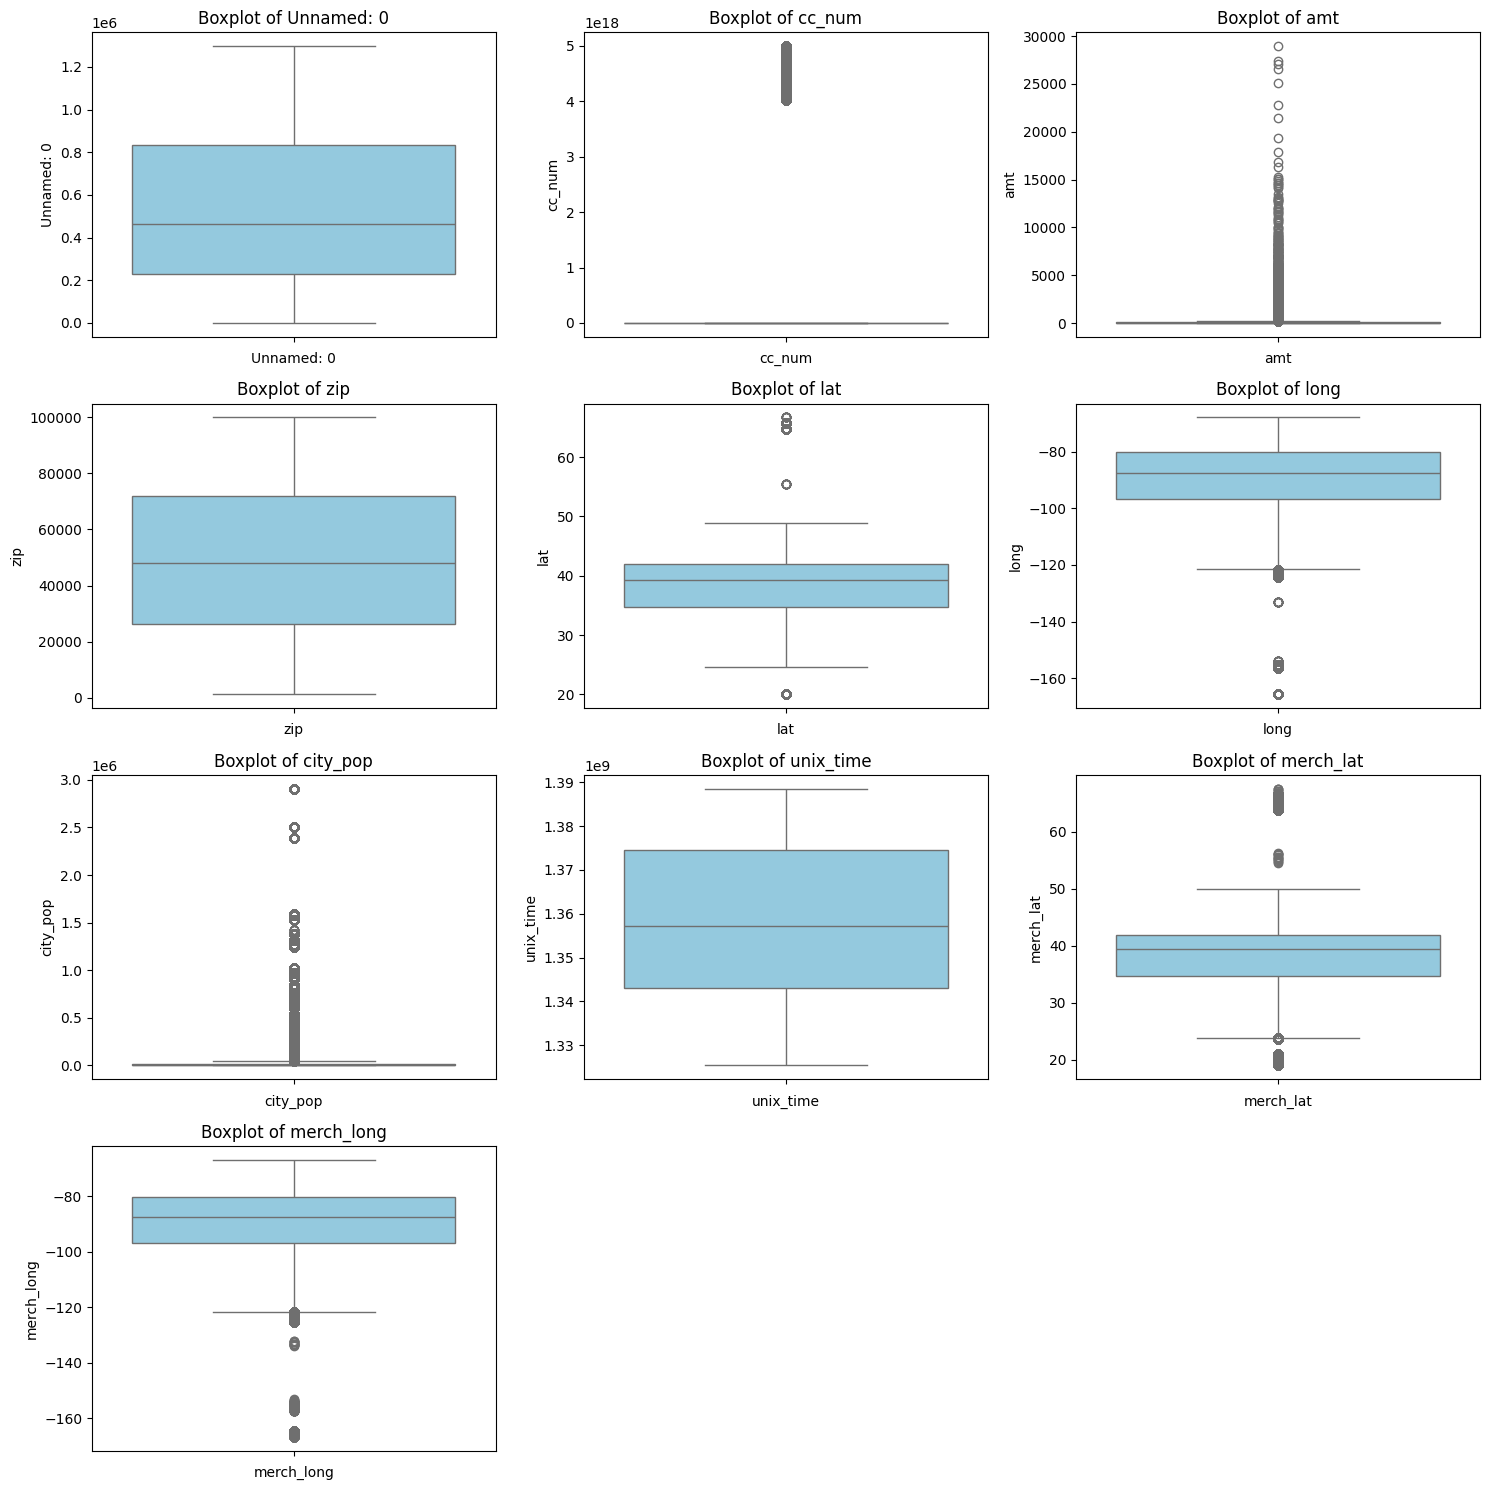

In [88]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numeric_columns) // 3 + 1, 3, figsize=(15, 15))
axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=df[column], ax=axes[i], color='skyblue') 
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    # Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
def get_outliers_info(df):
    outliers_dict = {}

    numeric_cols = df.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_rows = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        print(f"\nColumn: {col}")
        print(f"  Lower Bound: {lower_bound}")
        print(f"  Upper Bound: {upper_bound}")
        print(f"  Outliers Found: {len(outlier_rows)}")

        outliers_dict[col] = {
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'num_outliers': len(outlier_rows),
            'outlier_rows': outlier_rows
        }

    return outliers_dict

In [90]:
outliers_result = get_outliers_info(df)


Column: Unnamed: 0
  Lower Bound: -671491.125
  Upper Bound: 1736615.875
  Outliers Found: 0

Column: cc_num
  Lower Bound: -6513275846701038.0
  Upper Bound: 1.133557426847813e+16
  Outliers Found: 169771

Column: amt
  Lower Bound: -100.55
  Upper Bound: 193.29
  Outliers Found: 95054

Column: zip
  Lower Bound: -42470.5
  Upper Bound: 140749.5
  Outliers Found: 0

Column: lat
  Lower Bound: 23.761650000000007
  Upper Bound: 52.84764999999999
  Outliers Found: 6612

Column: long
  Lower Bound: -121.75800000000001
  Upper Bound: -55.198
  Outliers Found: 71026

Column: city_pop
  Lower Bound: -28639.5
  Upper Bound: 49708.5
  Outliers Found: 346191

Column: unix_time
  Lower Bound: 1295669831.5
  Upper Bound: 1421928477.5
  Outliers Found: 0

Column: merch_lat
  Lower Bound: 23.915911125000015
  Upper Bound: 52.78047412499999
  Outliers Found: 7063

Column: merch_long
  Lower Bound: -121.88093799999999
  Upper Bound: -55.26361000000001
  Outliers Found: 59972


🔍 Outlier Handling Decision
During the exploratory data analysis (EDA), we detected the presence of outliers in various numerical features using visual tools like box plots and statistical methods (IQR). However, we decided not to remove these outliers for the following reasons:

Potential Fraud Indicators: In fraud detection tasks, outliers can represent unusual or suspicious behaviors that are actually indicative of fraudulent activity. Removing these points might eliminate valuable patterns that the model needs to learn from.

Preserving Real-World Complexity: Transactions in real-world datasets are often noisy, and high-amount or rare-location transactions can be valid but still significant. Retaining these helps the model generalize better to realistic scenarios.

In [15]:
#renaming the columns to make them more readable
df.rename(columns={
    'cc_num': 'Credit_card_number',
    'merchant': 'Merchant_name',
    'category': 'Merchant_category',
    'amt': 'Transaction_amount',
    'gender': 'Gender',
    'lat': 'Customer_latitude',
    'long': 'Customer_longitude',
    'city_pop': 'Customer_city_population',
    'merch_lat': 'Merchant_latitude',
    'merch_long': 'Merchant_longitude',
    'is_fraud': 'Is_fraud',
    'dob':'Date_of_birth',
    'job':'Job'
}, inplace=True)

In [ ]:
#dropping the columns that are not needed
df.drop(columns=['first', 'last', 'street','Unnamed: 0','unix_time'],inplace=True,axis=1)

In [96]:
df.head()

,trans_date_trans_time,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,Customer_longitude,Customer_city_population,Job,Date_of_birth,trans_num,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,False,2019-01,Small
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,False,2019-01,Small
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,False,2019-01,Small
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,False,2019-01,Small
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,False,2019-01,Small


# Exploratory Data Analysis

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 20 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   trans_date_trans_time     datetime64[ns]
 1   Credit_card_number        int64         
 2   Merchant_name             object        
 3   Merchant_category         object        
 4   Transaction_amount        float64       
 5   Gender                    object        
 6   city                      object        
 7   state                     object        
 8   zip                       int64         
 9   Customer_latitude         float64       
 10  Customer_longitude        float64       
 11  Customer_city_population  int64         
 12  Job                       object        
 13  Date_of_birth             datetime64[ns]
 14  trans_num                 object        
 15  Merchant_latitude         float64       
 16  Merchant_longitude        float64       
 17  Is_fraud

In [98]:
# Count the occurrences of unique values in the 'is_fraud' column
fraud_uniqe= df['Is_fraud'].value_counts()
fraud_uniqe

Is_fraud
False    1842743
True        9651
Name: count, dtype: int64

this code generates a bar plot using Seaborn to visualize the distribution of fraud (1) vs. non-fraud (0) transactions in the dataset. 

It helps to identify class imbalance, which is crucial in fraud detection models

# 💡 Why is this useful?

```
Helps identify class imbalance (which can affect model performance)
Provides a quick overview of fraud occurrences in the dataset.
Useful for deciding whether to balance the dataset
```

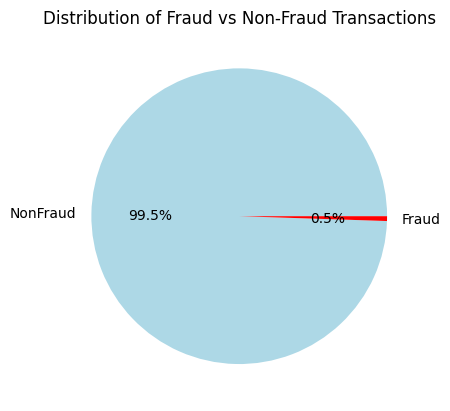

In [99]:
#Illustrate the proportion of fraudulent transactions compared to legitimate ones
colors =["lightblue", "red"]
labels = ['NonFraud','Fraud',]
plt.pie(df['Is_fraud'].value_counts(), labels=labels,colors=colors ,autopct='%1.1f%%')
plt.title('Distribution of Fraud vs Non-Fraud Transactions')
plt.show()

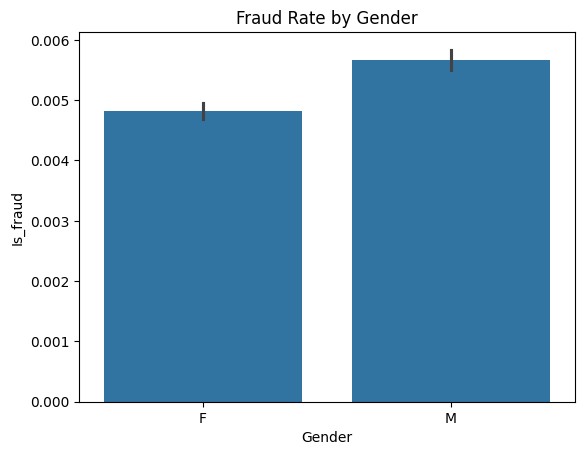

In [100]:
#Check if fraud rates differ by gender.
sns.barplot(data=df, x='Gender', y='Is_fraud')
plt.title('Fraud Rate by Gender')
plt.show()

In [10]:
#this function is used to category the city population into small, medium, and large
def categorybynum(pop):
    if pop < 50000:
        return "Small"
    elif pop < 500000:
        return "Medium"
    else:
        return "Large"
df['city_size'] = df['city_pop'].apply(categorybynum)

In [11]:
# USING CITY SIZE TO KNOW THE NUMBER OF FRAUDULENT TRANSACTIONS IN EACH CITY SIZE
fraud_counts_by_city = df.groupby('city_size')['is_fraud'].sum()
fraud_counts_by_city

city_size
Large      498
Medium    1280
Small     7873
Name: is_fraud, dtype: int64

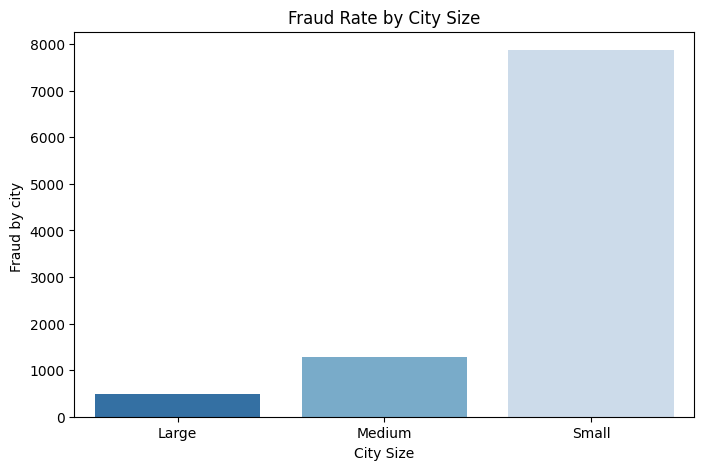

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(x=fraud_counts_by_city.index, y=fraud_counts_by_city.values,hue=fraud_counts_by_city.index, palette="Blues_r")
plt.xlabel("City Size")
plt.ylabel("Fraud by city ")
plt.title("Fraud Rate by City Size")
plt.show()

In [12]:
fraud_percent_by_city = df.groupby('city_size')['is_fraud'].mean() * 100
print(fraud_percent_by_city)

city_size
Large     0.531274
Medium    0.507023
Small     0.522705
Name: is_fraud, dtype: float64


“First I calculated the number of church operations in each type of city, and the highest number appeared in small cities, but then I calculated the crime rate ratio, and that was more accurate, because the number of operations varies depending on the size of the city.”

In [16]:
# checking the transaction amount column w.r.t fraudulent transactions
df[df['Is_fraud'] == 1]['Transaction_amount'].describe()

count    9651.000000
mean      530.661412
std       391.028873
min         1.060000
25%       240.075000
50%       390.000000
75%       902.365000
max      1376.040000
Name: Transaction_amount, dtype: float64

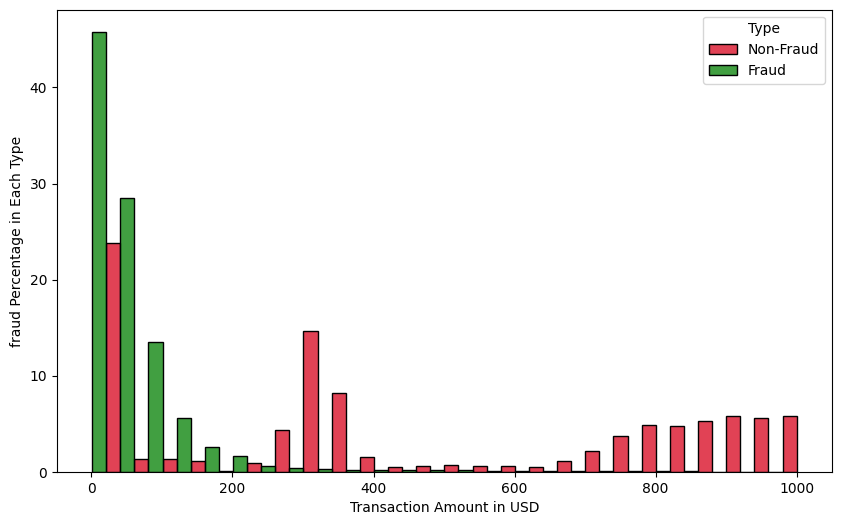

In [17]:
#amount vs fraud
colors =['#017f01','#d8031c']
plt.figure(figsize=(10,6))
ax=sns.histplot(x='Transaction_amount',data=df[df.Transaction_amount<=1000],hue='Is_fraud',stat='percent',multiple='dodge',common_norm=False,bins=25,palette=colors)
ax.set_ylabel('fraud Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Non-Fraud', 'Fraud'])

## How an average transaction amount varies w.r.t each month


In [103]:
time_series_piv = pd.pivot_table(data = df,
                                 index = 'trans_year_month',
                                 columns = 'Is_fraud',
                                 values = 'Transaction_amount',
                                 aggfunc = np.mean)

# check
time_series_piv

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\4071554872.py:1: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud,False,True
trans_year_month,,
2019-01,67.244077,517.352530
2019-02,67.490955,530.079458
2019-03,67.999841,481.047753
2019-04,67.345681,537.413005
2019-05,67.250211,516.051740
2019-06,68.349000,503.402825
2019-07,67.876023,570.095438
2019-08,67.182560,533.903482
2019-09,67.377040,520.754474


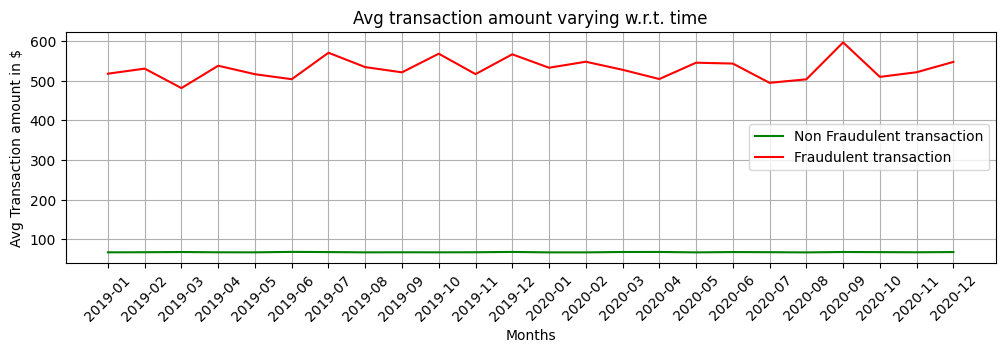

In [104]:
# let's visualize this
plt.figure(figsize = (12,3))
plt.title('Avg transaction amount varying w.r.t. time')
plt.plot(time_series_piv.index, time_series_piv[False], color = 'green', label = 'Non Fraudulent transaction')
plt.plot(time_series_piv.index, time_series_piv[True], color = 'red', label = 'Fraudulent transaction')
plt.grid()
plt.xlabel('Months')
plt.ylabel('Avg Transaction amount in $')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

Inferences: It is irregular and there's no pattern w.r.t. time

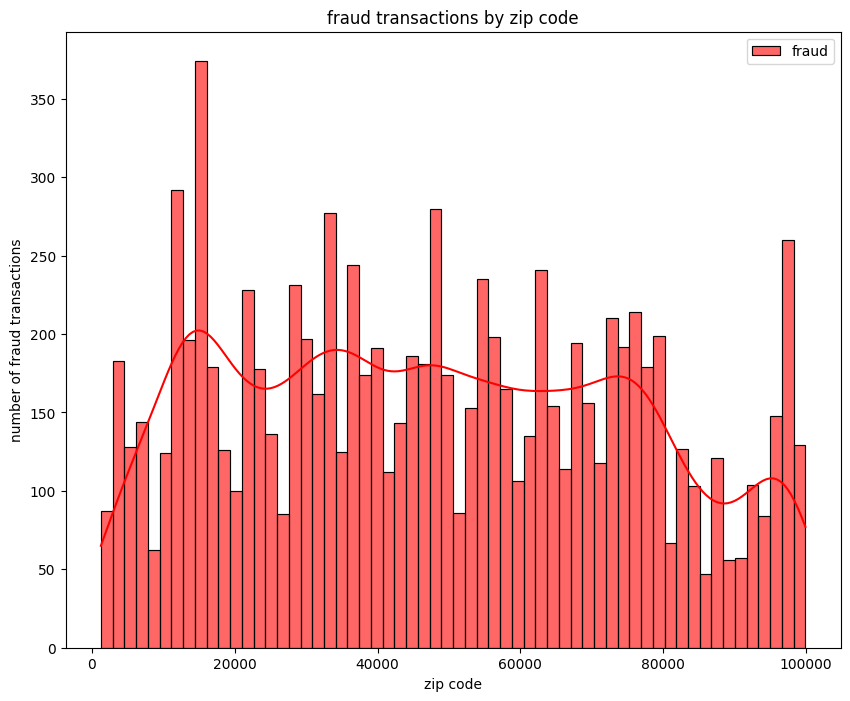

In [ ]:
#fraud by zip code
plt.figure(figsize=(10,8))
sns.histplot(df[df['Is_fraud']==1],x="zip",bins=60,kde=True, color="red",label="fraud", alpha=0.6)
plt.xlabel('zip code')
plt.legend()
plt.ylabel('number of fraud transactions')
plt.title('fraud transactions by zip code')
plt.show()

## Analysis Customers Job categories


In [106]:
# see all the customer job categories in the data
df['Job'].value_counts()

Job
Film/video editor                 13898
Exhibition designer               13167
Surveyor, land/geomatics          12436
Naval architect                   12434
Materials engineer                11711
                                  ...  
Engineer, water                       8
Armed forces technical officer        8
Ship broker                           7
Warehouse manager                     7
Contracting civil engineer            7
Name: count, Length: 497, dtype: int64

Is there any relationship between Customer's professional information and the fraudulent transactions?



In [107]:
df['Job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [109]:
df['Is_fraud'] = df['Is_fraud'].astype(int)

job_txn_piv = pd.pivot_table(data=df,
                             index='Job',
                             columns='Is_fraud',
                             values='Transaction_amount',
                             aggfunc='count')

job_txn_piv.sort_values(by=1, ascending=False, inplace=True)

In [110]:
# check the top 10 job categories of the customers which are more vulnerable towards fradulent transactions
job_txn_piv[:10]

Is_fraud,0,1
Job,,
Quantity surveyor,8011.0,69.0
Naval architect,12368.0,66.0
Materials engineer,11649.0,62.0
Audiological scientist,8743.0,58.0
Senior tax professional/tax inspector,5820.0,57.0
Trading standards officer,6555.0,56.0
Podiatrist,9471.0,54.0
Film/video editor,13846.0,52.0
Exhibition designer,13116.0,51.0


In [111]:
# avg cost incurred to bank due to fraudulent transactions w.r.t. each customer job category
job_txn_piv_2 = pd.pivot_table(data = df,
                               index = 'Job',
                               columns = 'Is_fraud',
                               values= 'Transaction_amount',
                               aggfunc = np.mean)

# check
job_txn_piv_2

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\2701326877.py:2: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud,0,1
Job,,
Academic librarian,59.978709,640.192727
"Accountant, chartered",NaN,485.706364
"Accountant, chartered certified",64.498041,669.404762
"Accountant, chartered public finance",54.398289,521.846667
Accounting technician,73.695373,605.632727
...,...,...
Water engineer,70.660723,283.579231
Water quality scientist,63.824663,685.065714
Web designer,57.169168,632.483889


In [112]:
# visualizing the top 10 job categories from high avg cost
job_txn_piv_2.sort_values(by = 1, ascending = False, inplace = True)

# check
job_txn_piv_2[:10]

Is_fraud,0,1
Job,,
Health promotion specialist,65.084065,920.257778
Ship broker,NaN,874.505714
Community education officer,59.453640,869.980000
Clinical psychologist,49.461961,864.783750
Hydrologist,69.746725,818.023889
Commissioning editor,64.621841,804.376667
Medical physicist,61.950005,801.131429
Hospital pharmacist,61.867750,776.057500
Plant breeder/geneticist,77.992390,773.039000


Index([0, 1], dtype='int64', name='Is_fraud')


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\3697777167.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




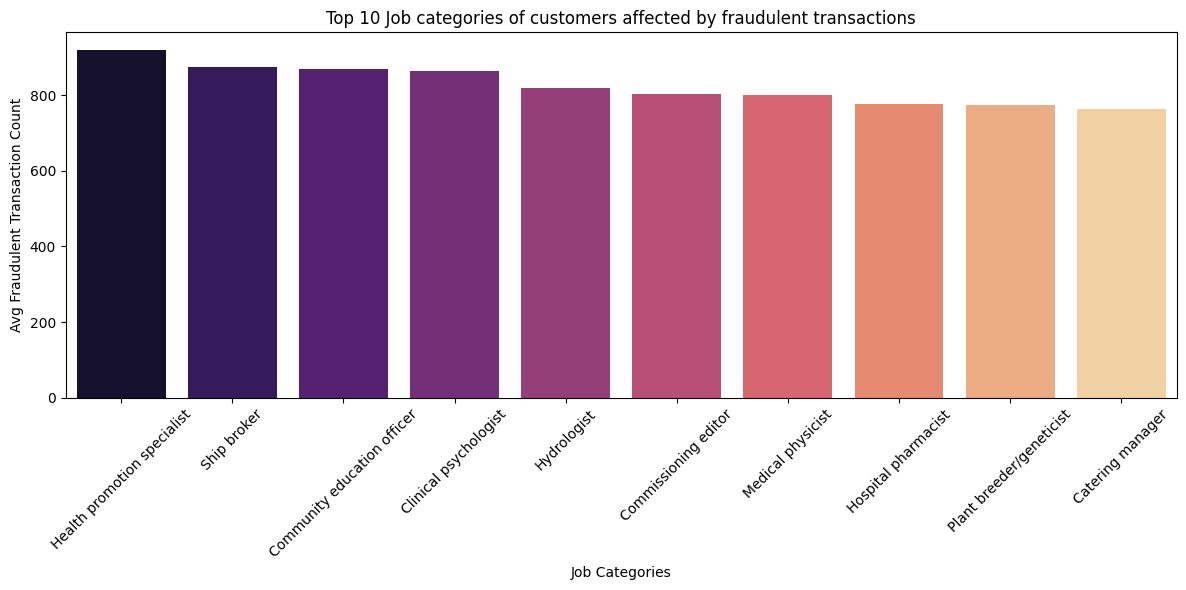

In [ ]:
# First, check the actual column names
print(job_txn_piv_2.columns)

# Assuming column name is 1 (int), or True (bool) — adjust accordingly
col_name = 1  # or `True` if that's what you find in columns

# Sort and get the top 10 jobs
top_jobs = job_txn_piv_2.sort_values(by=col_name, ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
plt.title('Top 10 Job categories of customers affected by fraudulent transactions')
sns.barplot(x=top_jobs.index, y=top_jobs[col_name],palette="magma")
plt.xlabel('Job Categories')
plt.ylabel('Avg Fraudulent Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inferences:Average cost incurred is highest for those customers who are Health promotion specialists. It is $920.25


# Top states having high average cost incurred to bank


In [114]:
state_piv = pd.pivot_table(data = df,
                           index = 'state',
                           columns = 'Is_fraud',
                           values = 'Transaction_amount',
                           aggfunc = np.mean)
# check
state_piv

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\2091967865.py:1: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud,0,1
state,,
AK,61.955064,604.397800
AL,62.867098,536.228417
AR,73.682327,501.256564
AZ,73.458862,507.085156
CA,71.178889,512.286020
CO,75.201913,516.973652
CT,61.771970,513.672321
DC,72.488092,525.161290
DE,NaN,514.493333


In [115]:
state_piv.sort_values(by = 1, ascending = False)

Is_fraud,0,1
state,,
RI,56.716205,732.984000
HI,56.634123,630.719375
VT,78.258114,617.669444
AK,61.955064,604.397800
NH,72.286827,603.708734
NM,58.534736,583.447934
MA,59.383266,578.328736
ND,63.475503,576.273810
IN,66.575316,575.877972


Inferences: Average cost per month incurred to bank is highest for those customers who belong to Rhode Island state, which is $732.98

In [116]:
# Filter fraud transactions
fraud_df = df[df["Is_fraud"] == 1]

# Count fraud transactions per state
fraud_by_state = fraud_df["state"].value_counts().reset_index()
fraud_by_state.columns = ["state", "fraud_count"]

fig = px.choropleth(
    fraud_by_state,
    locations="state",
    locationmode="USA-states",
    color="fraud_count",
    color_continuous_scale="Viridis",
    scope="north america",
    title="Fraud Transactions by State"
)
fig.show()

In [117]:
# deriving a column containing city and its respective state
df['city-state'] = df['city']+'-'+df['state']

# check
df['city-state']

0          Moravian Falls-NC
1                  Orient-WA
2              Malad City-ID
3                 Boulder-MT
4                Doe Hill-VA
                 ...        
1852389             Luray-MO
1852390      Lake Jackson-TX
1852391           Burbank-WA
1852392              Mesa-ID
1852393            Edmond-OK
Name: city-state, Length: 1852394, dtype: object

In [119]:
# pivoting
city_piv = pd.pivot_table(data = df,
                          index = 'city-state',
                          columns = 'Is_fraud',
                          values = 'Transaction_amount',
                          aggfunc = np.mean)

# check
city_piv

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\1148002518.py:2: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud,0,1
city-state,,
Achille-OK,50.401444,411.865385
Acworth-NH,93.952545,709.354615
Adams-WI,59.655901,676.559167
Afton-MI,62.704056,565.707143
Afton-MN,72.495744,445.716667
...,...,...
Woods Cross-UT,94.437603,NaN
Woodville-AL,51.893661,219.465000
Yellowstone National Park-WY,58.350726,648.406667


In [120]:
# orderding the cost incurred due to fraudulent transactions in descending order
city_piv.sort_values(by = 1, ascending = False, inplace = True)

# check the top 10 cities
city_piv[:10]

Is_fraud,0,1
city-state,,
De Lancey-NY,66.360867,926.156667
Monmouth Beach-NJ,65.084065,920.257778
North East-PA,NaN,918.425556
Arcadia-MI,59.333280,899.408571
Schaefferstown-PA,93.592899,897.211111
Thida-AR,71.254839,888.572500
Harrodsburg-IN,58.898636,884.250000
Oakford-IL,63.514107,878.527500
Karns City-PA,NaN,874.505714


Inferences:

Average cost per month incurred to bank is highest for those customers who belong to De Lancey city in Newyork state, which is $926.15.
Cities North East and Karns City, both belonging to Pennsylvania state have recorded only the Fraudulent transactions.

In [ ]:
# Aggregate fraud cases per city with lat/lon
fraud_by_city = fraud_df.groupby(["city", "Customer_latitude", "Customer_longitude"]).size().reset_index(name="fraud_count")

# Create a street-level scatter plot
fig = px.scatter_mapbox(
    fraud_by_city,
    lat="Customer_latitude",
    lon="Customer_longitude",
    text="city",  # Display city names
    size="fraud_count",  # Bubble size based on fraud count
    color="fraud_count",  # Color based on fraud count
    color_continuous_scale="Inferno",
    hover_name="city",
    zoom=4,  # Adjust zoom level
    mapbox_style="open-street-map",  # Use a street-style map
    title="Fraud Transactions by City"
)
# Show the map
fig.show()


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\2290048004.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



Inferences: As we see, the concentration of Fraudulent transactions is more in Eastern USA.


In [122]:
fraud_by_city = fraud_df.groupby(["city", "Customer_latitude", "Customer_longitude", "Customer_city_population"]).size().reset_index(name="fraud_count")

# Drop missing values
fraud_by_city = fraud_by_city.dropna(subset=["Customer_latitude", "Customer_longitude", "Customer_city_population"])

# Create scatter map with bubble size based on city population
fig = px.scatter_mapbox(
    fraud_by_city,
    lat="Customer_latitude",
    lon="Customer_longitude",
    text="city",
    size="Customer_city_population",  # Bubble size represents population
    color="fraud_count",  # Fraud count is shown by color
    color_continuous_scale="Plasma",
    hover_name="city",
    hover_data={"fraud_count": True, "Customer_city_population": True},
    zoom=4,
    mapbox_style="carto-positron",
    title="Fraud Transactions vs. City Population"
)

fig.show()


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\4184011048.py:7: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# Top merchant categories which are targeted while performing fraudulent transactions in terms of average transaction amount.

In [123]:
print('category contains', len(df['Merchant_category'].unique()), 'labels')       
df.Merchant_category.value_counts()

category contains 14 labels


Merchant_category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [124]:
# This code snippet calculates the number of fraudulent transactions for each category in the dataset.
fraud_countsby_category= df[df['Is_fraud'] == 1].groupby('Merchant_category')['Is_fraud'].count()
fraud_countsby_category

Merchant_category
entertainment      292
food_dining        205
gas_transport      772
grocery_net        175
grocery_pos       2228
health_fitness     185
home               265
kids_pets          304
misc_net          1182
misc_pos           322
personal_care      290
shopping_net      2219
shopping_pos      1056
travel             156
Name: Is_fraud, dtype: int64

### code visualize the number of fraudulent transactions per merchant category using a bar plot.


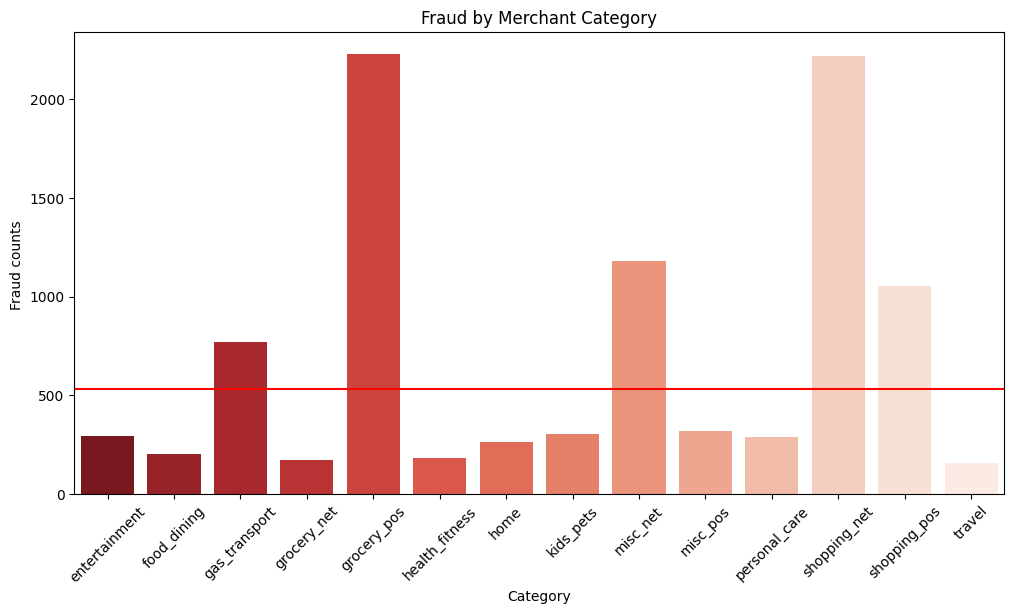

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=fraud_countsby_category.index, y=fraud_countsby_category.values,hue=fraud_countsby_category.index, palette="Reds_r")
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.xticks(rotation=45)
plt.xlabel("Category")
plt.ylabel("Fraud counts ")
plt.title("Fraud by Merchant Category")
plt.show()

Inferences: High value fraudulent transactions happened for the merchant category shopping_net which means online shopping.


In [126]:
# deriving hours from the transaction date time column
df['trans_hour'] = df['trans_date_trans_time'].dt.time.apply(lambda x: str(x)[:2])

# check
df['trans_hour']

0          00
1          00
2          00
3          00
4          00
           ..
1852389    23
1852390    23
1852391    23
1852392    23
1852393    23
Name: trans_hour, Length: 1852394, dtype: object

Let's figure out usually at what hour of the time, the frequency of fradulent transactions is high

In [127]:
time_piv = pd.pivot_table(data = df,
                          index = 'trans_hour',
                          columns = ['Is_fraud'],
                          values = 'Transaction_amount',
                          aggfunc = 'count')

# check
time_piv

Is_fraud,0,1
trans_hour,,
00,59832,823
01,60503,827
02,60003,793
03,60165,803
04,59877,61
05,60008,80
06,60352,54
07,60229,72
08,60439,59


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\4270885950.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




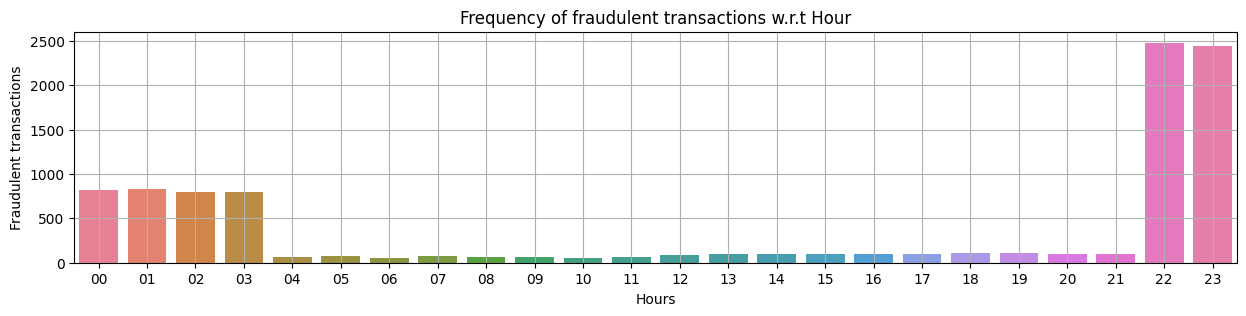

In [128]:
 # let's visualize
plt.figure(figsize = (15,3))
plt.title('Frequency of fraudulent transactions w.r.t Hour')
sns.barplot(data = time_piv, x = time_piv.index, y = time_piv[1],palette = 'husl')
plt.xlabel('Hours')
plt.ylabel('Fraudulent transactions')
plt.grid()
plt.show()

Inferences: In the two years span, high number of transactions happened during night time, i.e., from 10 PM to 3 AM.



Let's figure out at what hour of the time, average cost incurred to bank is high


In [129]:
time_piv_amt = pd.pivot_table(data = df,
                              index = 'trans_hour',
                              columns = ['Is_fraud'],
                              values = 'Transaction_amount',
                              aggfunc = np.mean)

# check
time_piv_amt

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\3069347594.py:1: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud,0,1
trans_hour,,
00,74.881872,344.455808
01,75.574026,358.350387
02,76.118122,360.258689
03,75.577875,353.571245
04,75.716290,312.402131
05,75.598080,310.636125
06,75.660059,323.170000
07,75.632552,369.261111
08,75.895848,333.571017


C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\4279701558.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




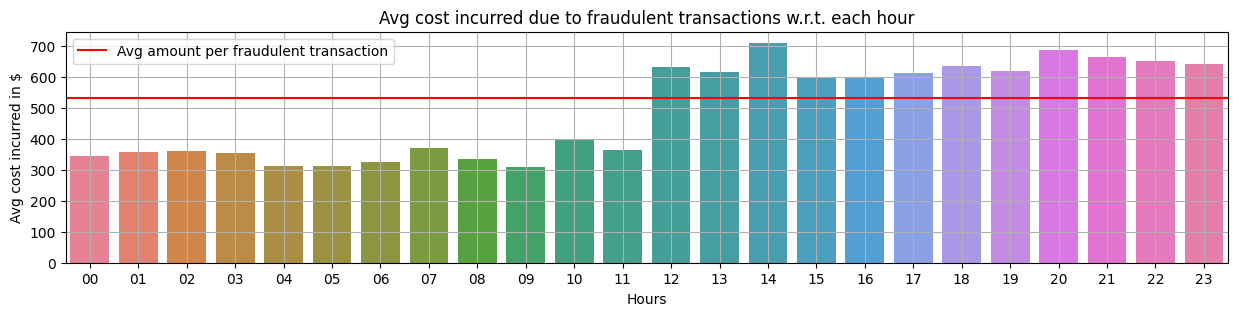

In [130]:
# let's visualize
plt.figure(figsize = (15,3))
plt.title('Avg cost incurred due to fraudulent transactions w.r.t. each hour')
sns.barplot(data = time_piv_amt, x = time_piv_amt.index, y = time_piv_amt[1],palette = 'husl')
plt.axhline(y = 530.66, color = 'r', linestyle = '-', label = 'Avg amount per fraudulent transaction')
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Avg cost incurred in $')
plt.legend()
plt.show()

Inferences: Average cost incurred to bank is highest during 2 PM, i.e., $ 709.07.

In [131]:
#It is in the range between $(600-750) from 12 PM to 11 PM.

In [132]:
merch_txn_hr_piv = pd.pivot_table(data = df,
                                  index = ['trans_hour','Merchant_category'],
                                  columns = 'Is_fraud',
                                  values = 'Transaction_amount',
                                  aggfunc = np.mean)

# check
merch_txn_hr_piv

C:\Users\Youssef Abdel Khaleq\AppData\Local\Temp\ipykernel_9544\3046933763.py:1: FutureWarning:

The provided callable <function mean at 0x000001D19B2B7920> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.



Is_fraud                               0            1
trans_hour Merchant_category                         
00         entertainment       46.105105   477.166000
           food_dining         79.750508   118.308000
           gas_transport       63.694597    12.454525
           grocery_net         53.421556    11.711579
           grocery_pos        114.587439   308.940433
...                                  ...          ...
23         misc_pos            67.834111    21.956857
           personal_care       48.172712    25.746228
           shopping_net        73.792733  1001.199531
           shopping_pos        80.621180   882.603636
           travel             112.229316     8.476167

[252 rows x 2 columns]

# show the distribution of all numeric columnss

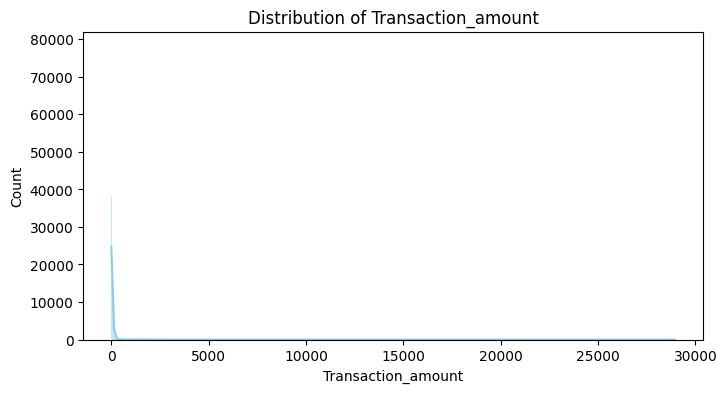

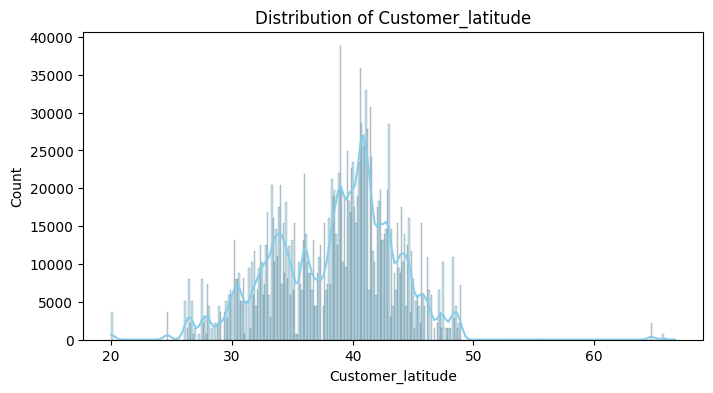

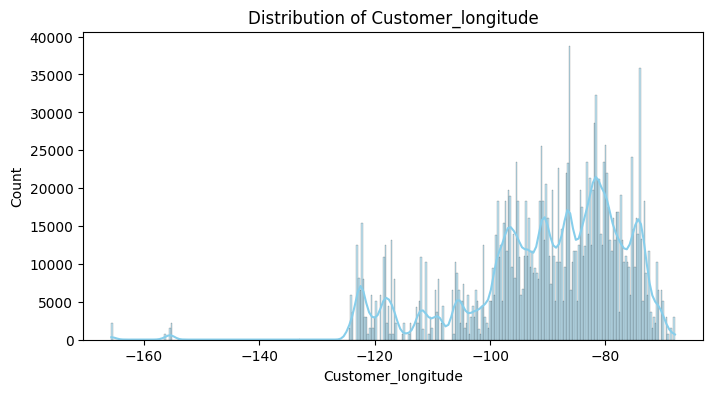

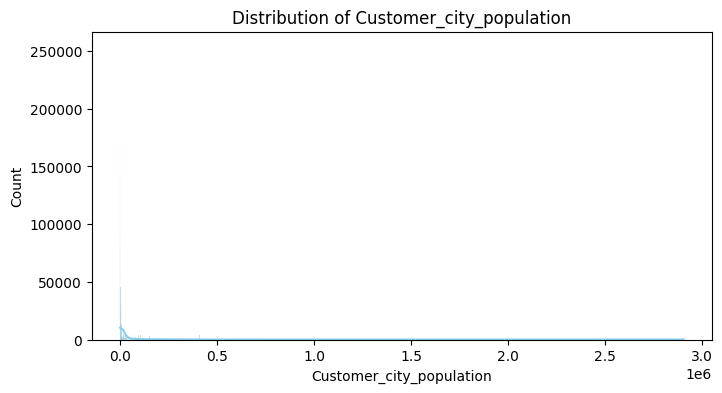

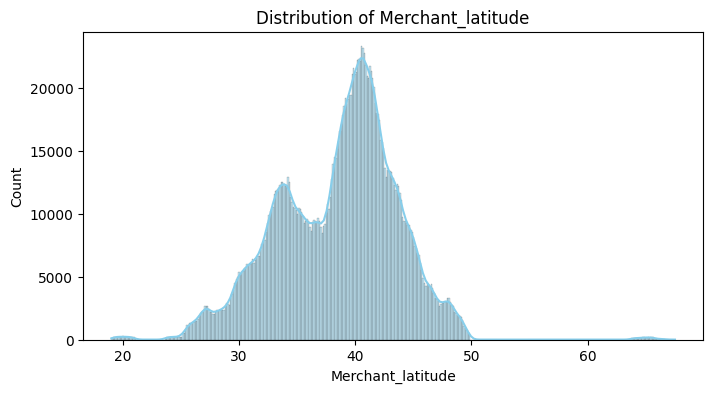

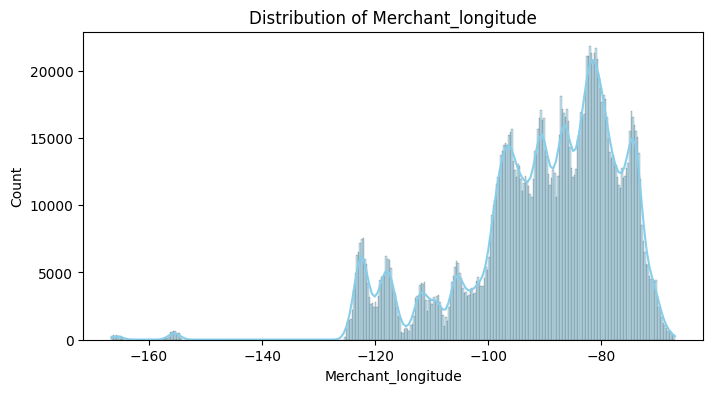

In [133]:
numeric_cols = [
    'Transaction_amount',
    'Customer_latitude',
    'Customer_longitude',
    'Customer_city_population',
    'Merchant_latitude',
    'Merchant_longitude'
]

for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()

In [135]:
df.head()

,trans_date_trans_time,Credit_card_number,Merchant_name,Merchant_category,Transaction_amount,Gender,city,state,zip,Customer_latitude,...,Job,Date_of_birth,trans_num,Merchant_latitude,Merchant_longitude,Is_fraud,trans_year_month,city_size,city-state,trans_hour
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,Moravian Falls,NC,28654,36.0788,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2019-01,Small,Moravian Falls-NC,00
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Orient,WA,99160,48.8878,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2019-01,Small,Orient-WA,00
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,M,Malad City,ID,83252,42.1808,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2019-01,Small,Malad City-ID,00
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Boulder,MT,59632,46.2306,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2019-01,Small,Boulder-MT,00
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,M,Doe Hill,VA,24433,38.4207,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2019-01,Small,Doe Hill-VA,00


In [136]:
#save the cleaned dataset to a new csv file
df.to_csv('cleand_dataset.csv', index=False)